In [28]:
import numpy as np
import pandas as pd
import os

train_data = []
val_data = []
test_data = []

for dirname, _, filenames in os.walk('/kaggle/input/1000-videos-split'):
    for filename in filenames:
        if 'validation' in dirname:
            val_data.append(os.path.join(dirname, filename))
        elif 'train' in dirname:
            train_data.append(os.path.join(dirname, filename))
        else:
            test_data.append(os.path.join(dirname, filename))

In [29]:
df_train = pd.DataFrame(train_data)
df_val = pd.DataFrame(val_data)
df_test = pd.DataFrame(test_data)

In [30]:
import os
import pandas as pd

# Path to the dataset directory
dataset_dir = '/kaggle/input/1000_videos/'

train_data = []
val_data = []
test_data = []

# Walk through the directory and classify files into train, validation, and test
for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        if 'validation' in dirname:
            val_data.append(os.path.join(dirname, filename))
        elif 'train' in dirname:
            train_data.append(os.path.join(dirname, filename))
        elif 'test' in dirname:
            test_data.append(os.path.join(dirname, filename))

# Convert the file paths into DataFrames
df_train = pd.DataFrame(train_data, columns=['file_path'])
df_val = pd.DataFrame(val_data, columns=['file_path'])
df_test = pd.DataFrame(test_data, columns=['file_path'])

# Print the first few rows of each DataFrame
print("Train DataFrame:")
print(df_train.head())
print("Validation DataFrame:")
print(df_val.head())
print("Test DataFrame:")
print(df_test.head())


Train DataFrame:
                                           file_path
0  /kaggle/input/1000_videos/train/fake/id1_id30_...
1  /kaggle/input/1000_videos/train/fake/id0_id6_0...
2  /kaggle/input/1000_videos/train/fake/id1_id2_0...
3  /kaggle/input/1000_videos/train/fake/id0_id6_0...
4  /kaggle/input/1000_videos/train/fake/165_137_6...
Validation DataFrame:
                                           file_path
0  /kaggle/input/1000_videos/validation/fake/019_...
1  /kaggle/input/1000_videos/validation/fake/066_...
2  /kaggle/input/1000_videos/validation/fake/029_...
3  /kaggle/input/1000_videos/validation/fake/019_...
4  /kaggle/input/1000_videos/validation/fake/052_...
Test DataFrame:
                                           file_path
0  /kaggle/input/1000_videos/test/fake/113_983_1.png
1  /kaggle/input/1000_videos/test/fake/095_053_38...
2  /kaggle/input/1000_videos/test/fake/089_065_4.png
3  /kaggle/input/1000_videos/test/fake/074_825_2.png
4  /kaggle/input/1000_videos/test/fake/076_0

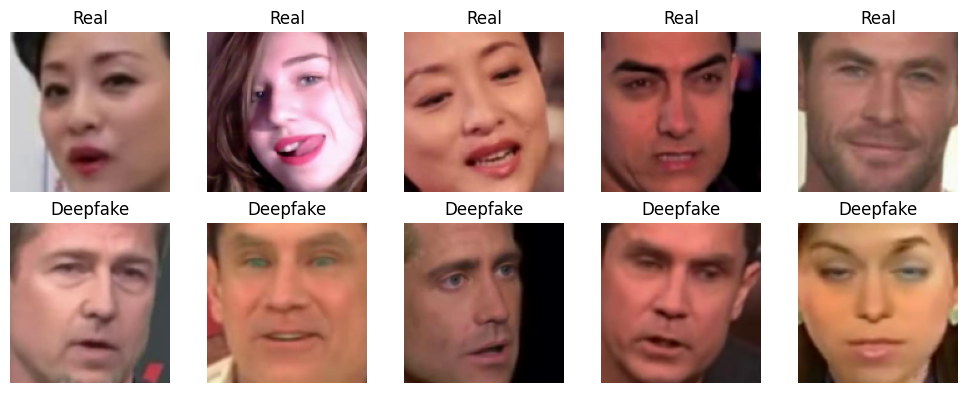

In [31]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd

# Function to assign labels based on file path
def label_file(row):
    if 'fake' in row:
        return 1  # Deepfake
    elif 'real' in row:
        return 0  # Real
    else:
        return 'undefined'

# Apply the label function to the 'file_path' column
df_train['label'] = df_train['file_path'].apply(label_file)

# Create subplots
fig, ax = plt.subplots(2, 5, figsize=(10, 4))

# Titles for the subplots
titles = ['Real', 'Deepfake']

# Loop through each label (0 and 1)
for i, label in enumerate([0, 1]):
    # Get the first 5 image paths for the current label
    img_paths = df_train[df_train['label'] == label].iloc[:5, 0]
    
    # Loop through each image path
    for j, img_path in enumerate(img_paths):
        # Read the image
        img = cv.imread(img_path)
        # Convert BGR to RGB
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        # Display the image
        ax[i, j].imshow(img_rgb)
        ax[i, j].axis('off')
        ax[i, j].set_title(titles[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [32]:
df_train.head()

file_path  label
0  /kaggle/input/1000_videos/train/fake/id1_id30_...      1
1  /kaggle/input/1000_videos/train/fake/id0_id6_0...      1
2  /kaggle/input/1000_videos/train/fake/id1_id2_0...      1
3  /kaggle/input/1000_videos/train/fake/id0_id6_0...      1
4  /kaggle/input/1000_videos/train/fake/165_137_6...      1

In [33]:
# Apply the label function to the 'file_path' column for validation and test datasets
df_val['label'] = df_val['file_path'].apply(label_file)
df_test['label'] = df_test['file_path'].apply(label_file)

# Now, you can check the value counts for all datasets
print(df_train['label'].value_counts())
print(df_val['label'].value_counts())
print(df_test['label'].value_counts())


label
1    6028
0    5605
Name: count, dtype: int64
label
1    1200
0    1200
Name: count, dtype: int64
label
1    1200
0    1200
Name: count, dtype: int64


In [34]:
# Input and output paths
input_image_path = "/kaggle/input/1000_videos/train/fake/128_896_10.png"
cropped_face_path = "cropped_face.jpg"
output_image_path = "output.jpg"

# Step 1: Detect and crop face
cropped_face = detect_and_crop_face(input_image_path)
cv2.imwrite(cropped_face_path, cropped_face)

# Step 2: Apply EVM to the cropped face
preprocess_image_with_evm(cropped_face_path, output_image_path, mode="motion", amplification=20)

NameError: name 'detect_and_crop_face' is not defined

In [35]:
!pip install image-classifiers

ERROR: Could not find a version that satisfies the requirement image-classifiers (from versions: none)
ERROR: No matching distribution found for image-classifiers


In [36]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import (
    GlobalAveragePooling2D,
    Dense,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Constants
SIZE = 128
DIM = (SIZE, SIZE, 3)
BATCH_SIZE = 50

# Load MobileNetV3Small as the base model
# If weights are pre-downloaded, use them; otherwise, initialize without weights.
# Replace '/path/to/weights' with the actual path if you have downloaded the weights.
try:
    weights_path = "/path/to/weights/weights_mobilenet_v3_small_224_1.0_float_no_top_v2.h5"
    base_model = MobileNetV3Small(input_shape=DIM, weights=None, include_top=False)
    base_model.load_weights(weights_path)
    print("Loaded pre-downloaded weights successfully.")
except Exception as e:
    print(f"Could not load pre-downloaded weights: {e}. Initializing without weights.")
    base_model = MobileNetV3Small(input_shape=DIM, weights=None, include_top=False)

# Fine-tune by setting some layers as trainable
for layer in base_model.layers[-30:]:  # Fine-tune top 30 layers
    layer.trainable = True

# Extract global features using GlobalAveragePooling
x = GlobalAveragePooling2D()(base_model.output)

# Add Dense layers for feature learning
x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)  # Normalize activations
x = Dropout(0.5)(x)  # Regularization

x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

# Output layer for binary classification
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

# Display model summary
model.summary()


Could not load pre-downloaded weights: [Errno 2] Unable to synchronously open file (unable to open file: name = '/path/to/weights/weights_mobilenet_v3_small_224_1.0_float_no_top_v2.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0). Initializing without weights.


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 128, 128,  │          0 │ input_layer_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 64, 64,    │        432 │ rescaling_3[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 64, 64,    │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_54       │ (None, 64, 64,    │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 65, 65,    │          0 │ activation_54[0]… │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 32, 32,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_42 (ReLU)     │ (None, 32, 32,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu_42[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_27 (Add)        │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_43 (ReLU)     │ (None, 1, 1, 16)  │          0 │ add_27[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_27         │ (None, 1, 1, 16)  │          0 │ re_lu_43[0][0]    │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 32, 32,    │          0 │ re_lu_42[0][0],   │
│ (Multiply)          │ 16)               │            │ multiply_27[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,022,065 (3.90 MB)

 Trainable params: 1,009,569 (3.85 MB)

 Non-trainable params: 12,496 (48.81 KB)

In [37]:
import cv2
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow import keras

class DataGenerator(keras.utils.Sequence):
    def __init__(self, df, batch_size=BATCH_SIZE, dim=DIM, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.indices = self.df.index.tolist()
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return len(self.indices) // self.batch_size

    def __getitem__(self, index):
        index = self.index[index * self.batch_size:(index + 1) * self.batch_size]
        batch = [self.indices[k] for k in index]
        
        X, y = self.__get_data(batch)
        return X, y

    def on_epoch_end(self):
        self.index = np.arange(len(self.indices))
        if self.shuffle:
            np.random.shuffle(self.index)

    def __get_data(self, batch):
        X = np.empty((self.batch_size, *self.dim))
        y = np.empty((self.batch_size), dtype=int)

        for i, id in enumerate(batch):
            img = cv2.imread(self.df.iloc[id, 0])  # Update this line if column is named differently
            img = cv2.resize(img, (self.dim[0], self.dim[1]))
            img = preprocess_input(img)  # Preprocess image with MobileNet's preprocess_input
            X[i,] = img
            y[i] = self.df['label'][id]

        return X, y


In [38]:
train_gen = DataGenerator(df_train)
val_gen = DataGenerator(df_val, shuffle=False)
test_gen = DataGenerator(df_test, shuffle=False)

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.metrics import AUC, F1Score, Precision, Recall, BinaryAccuracy

LR = 0.001

# Callbacks
es = EarlyStopping(monitor='loss', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=0.001)
callbacks = [es, reduce_lr]

# Compile the model
model.compile(loss=BinaryCrossentropy(),
              optimizer=Adam(learning_rate=LR), 
              metrics=[AUC, Precision, Recall, BinaryAccuracy])
# Train the model
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=50, 
                    batch_size=BATCH_SIZE, 
                    callbacks=callbacks)

Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


232/232 ━━━━━━━━━━━━━━━━━━━━ 171s 593ms/step - auc: 0.5549 - binary_accuracy: 0.5438 - loss: 0.8552 - precision: 0.5634 - recall: 0.5413 - val_auc: 0.5000 - val_binary_accuracy: 0.5000 - val_loss: 0.6937 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 109s 467ms/step - auc: 0.7150 - binary_accuracy: 0.6584 - loss: 0.6524 - precision: 0.6707 - recall: 0.6522 - val_auc: 0.5000 - val_binary_accuracy: 0.5000 - val_loss: 0.6976 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 106s 454ms/step - auc: 0.8600 - binary_accuracy: 0.7801 - loss: 0.4738 - precision: 0.7879 - recall: 0.7878 - val_auc: 0.5000 - val_binary_accuracy: 0.5000 - val_loss: 0.6934 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
232/232 ━━━━━━━━━━━━━━━━━━━━ 105s 451ms/step - auc: 0.9296 - binary_accuracy: 0.8594 - loss: 0.3387 - precision: 0.8753 - recall: 0.8511 - val_auc: 

In [16]:
import matplotlib.pyplot as plt
def plot_training_history(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot Accuracy
    plt.figure(figsize=(14, 6))
    
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

plot_training_history(history)

NameError: name 'history' is not defined

In [16]:
results = model.evaluate(test_gen)

48/48 ━━━━━━━━━━━━━━━━━━━━ 26s 549ms/step - auc: 0.4961 - binary_accuracy: 0.9027 - loss: 0.4433 - precision: 0.9896 - recall: 0.8898


48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step
Confusion Matrix:
[[0.89620449 0.03877367]
 [0.10379551 0.96122633]]

ROC AUC Score: 0.9262499999999998

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1200
           1       0.96      0.89      0.92      1200

    accuracy                           0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



<Axes: >

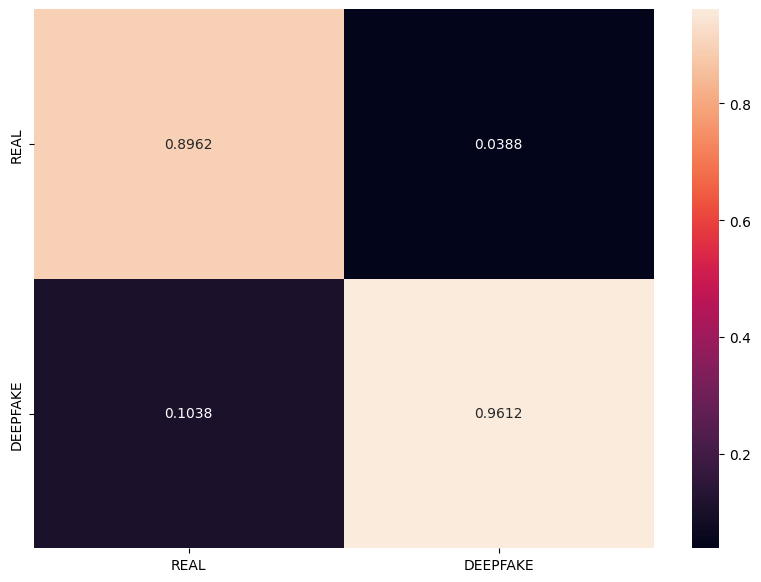

In [17]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
import seaborn as sn

# Assuming 'model' is your trained neural network model and 'test_gen' is your test data generator
y_pred_nn = model.predict(test_gen)
y_pred_nn_norm = (y_pred_nn > 0.5).astype(int)

# Confusion Matrix
cm_nn = confusion_matrix(df_test['label'], y_pred_nn_norm, normalize='pred')
print("Confusion Matrix:")
print(cm_nn)

# ROC AUC Score
roc_auc = roc_auc_score(df_test['label'], y_pred_nn_norm)
print("\nROC AUC Score:", roc_auc)

# Classification Report
class_report = classification_report(df_test['label'], y_pred_nn_norm)
print("\nClassification Report:")
print(class_report)

df_cm = pd.DataFrame(cm_nn, index = [i for i in ["REAL","DEEPFAKE"]], columns = [i for i in ["REAL","DEEPFAKE"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.4f')

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model

# Custom function to remove metrics
def save_model_without_metrics(model, filename):
    # Extract the configuration of the model
    config = model.get_config()
    # Remove metrics from the config
    config['metrics'] = None
    # Recreate the model with the same config but without metrics
    new_model = Model.from_config(config)
    new_model.set_weights(model.get_weights())
    new_model.save(filename)

# Use the custom function to save your model
save_model_without_metrics(model, "binary-pred.h5")
print("Model saved successfully without metrics as 'binary-pred.h5'.")

Model saved successfully without metrics as 'binary-pred.h5'.


In [19]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [20]:
# Get the size of the model file in megabytes
model_size = os.path.getsize("/kaggle/working/binary-pred.h5") / (1024 * 1024)
print(f"Model Size: {model_size:.2f} MB")

Model Size: 90.05 MB


In [21]:
import time
import numpy as np

# Prepare a dummy input
sample_input = np.random.rand(1, SIZE, SIZE, 3).astype(np.float32)  # Adjust shape to model's input

# Warm-up (Optional, to stabilize timing)
for _ in range(5):
    _ = model(sample_input)

# Measure inference time
start_time = time.time()
_ = model(sample_input)
inference_time = time.time() - start_time

print(f"Inference Time: {inference_time:.4f} seconds per sample")

Inference Time: 0.1616 seconds per sample


In [22]:
# Calculate dataset sizes
train_size = len(df_train)
test_size = len(df_test)

print(f"Training Set Size: {train_size}")
print(f"Testing Set Size: {test_size}")


Training Set Size: 11633
Testing Set Size: 2400
